Danny Abraham
<center><h1>CMPS 351</h1></center>
<center><h2>Assignment 5</h2></center>

In [1]:
import numpy as np
from numpy import linalg as la
import matplotlib.pyplot as plt
from scipy.optimize import linprog as lp

## Exercise in R^3
---
#### Lagrangian

In [2]:
def lagrangian(x, l):
    f = x[0]*x[1] + x[1]*x[2]
    h1 = l[0]*(x[0]**2 + x[1]**2 - 2)
    h2 = l[1]*(x[0]**2 + x[2]**2 - 2) 
    return f + h1 + h2

#### Objective Function

In [3]:
def lagrangian_grad(x, l):
    g = np.zeros(5)
    g[0] = x[1] + 2*l[0]*x[0] + 2*l[1]*x[0]
    g[1] = x[0] + x[2] + 2*l[0]*x[1]
    g[2] = x[1] + 2*l[1]*x[2]
    g[3] = x[0]**2 + x[1]**2 -2
    g[4] = x[0]**2 + x[2]**2 -2
    return g

#### Gradient

In [4]:
def lagrangian_hess(x, l):
    h = np.zeros([5, 5])
    h[0] = np.array([2*l[0] + 2*l[1], 1, 0, 2*x[0], 2*x[0]])
    h[1] = np.array([1, 2*l[0], 1, 2*x[1], 0])
    h[2] = np.array([0, 1, 2*l[1], 0, 2*x[2]])
    h[3] = np.array([2*x[0], 2*x[1], 0, 0, 0])
    h[4] = np.array([2*x[0], 0, 2*x[2], 0, 0])
    return h

#### Globally Convergent Newton

In [5]:
def backtrack_linesearch(f, gk, pk, xk, alpha = 0.01, beta = 0.6):
    t = 1
    while ( la.norm(f((xk + t*pk)[:-2], (xk + t*pk)[3:]))/2 > la.norm(f(xk[:-2], xk[3:]))/2 + alpha*t*gk@pk):
        t *= beta
    return t

In [6]:
def newton_method(x0, tol = 1e-6):
    x = x0
    history = np.array([x0])
    while (la.norm(lagrangian_grad(x[:-2], x[3:])) >= tol):
        p = la.solve(lagrangian_hess(x[:-2], x[3:]), -lagrangian_grad(x[:-2], x[3:]))
        t = backtrack_linesearch(lagrangian_grad, lagrangian_grad(x[:-2], x[3:]), p, x)
        x += t * p
        history = np.append(history, [x])
        #print(la.norm(lagrangian_grad(x[:-2], x[3:])))
    return x, history

In [7]:
x0 = np.array([0.1, 0.0000001, 0.0000001, 1, 1])
xstar, history = newton_method(x0)
print(xstar)

[ 1.30656297 -0.5411961  -0.5411961   0.70710679 -0.50000001]


## Significance of the Lagrange Multipliers
---

The Taylor series of the constraint gives us
<img src='1.png'>

The modified constraint h\[i\] is shifted by e
<img src='2.png'>
<img src='3.png'>
<img src='4.png'>

For a feasible direction, we need to move on the surface perpendicular to the gradients of the constraints
<img src='5.png'>

Taylor series of the objective function
<img src='6.png'>

But the graient of the bjective function can be written as
<img src='7.png'>
<img src='8.png'>

## Nonnegativity of the Lagrange Multipliers
---

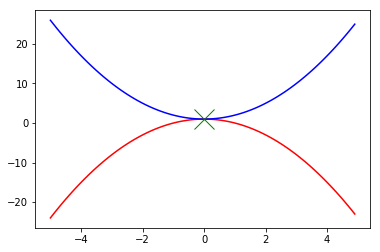

In [8]:
f1 = lambda x : 1 - x**2
f2 = lambda x : 1 + x**2

x = np.arange(-5., 5., 0.1)
plt.plot(x, f1(x), color='red')
plt.plot(x, f2(x), color='blue')
plt.plot(f1(0), marker='x', color='green', ms=20)

When the inequality contraint is inactive, lambda = 0

When the inequality constraint is active, the gradient of the objective function and the gradient of the constraint are aligned but have opposite directions. This is demonstrated in the example above with f1 and f2.


<img src='this.png'>

Because the gradients are aligned and opposite, lambda must be positive

## Necessary but not Sufficient Conditions
---
#### Lagrangian

In [9]:
def lag(x, l):
    return x[0] - x[1] + l*(x[0]*x[1] + 4)

#### Lagrangian Gradient

In [10]:
def lag_grad(x, l):
    g = np.zeros(3)
    g[0] = l*x[1] + 1
    g[1] = l*x[0] - 1
    g[2] = x[0]*x[1] + 4
    return g

In [11]:
x = np.array([2, -2])
l = 0.5
print(lag_grad(x, l))
x = np.array([-2, 2])
l = -0.5
print(lag_grad(x, l))

[0. 0. 0.]
[0. 0. 0.]


For x = \[2, -2\] and for x = \[-2, 2\] the first order optimality conditions are satisfied, however neither are the optimal points because x = \[-4, 1\] achieves a smaller value for the primal problem at f(x) = -5 and it satisfies the constraint

## Healthy Snack 
---

In [12]:
c = [50, 80]
A = [[-3, 0], 
     [-2, -4], 
     [-2,-5]]
b = [-6, -10, -8]
res = lp(c, A_ub=A, b_ub=b, options = { "disp" : True } )

Optimization terminated successfully.
         Current function value: 220.000000  
         Iterations: 2


In [13]:
print(res)

     con: array([], dtype=float64)
     fun: 220.0
 message: 'Optimization terminated successfully.'
     nit: 2
   slack: array([0. , 0. , 3.5])
  status: 0
 success: True
       x: array([2. , 1.5])


Lagrangian:
<img src='10.png'>

Optimality conditions:
<img src='11.png'>
<img src='12.png'>

Since the third consraint is not active lambda3 is equal to 0. 

Solving for lambda1 and lambda2 we get 10/3 and 20 respectively.

The lagrange multipliers represent the sensitivity towards a certain constraint. For example here we know optimality will more if we change the second constraint than if we change the third constraint. Also the changing teh first constraint wont change optimality. This is of course for small changes.

